In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


## Load the Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Path to your complaints.csv file on Google Drive
file_path = '/content/drive/My Drive/complaints.csv'

# Define the columns you need.
columns_to_load = [
    'Product',
    'Consumer complaint narrative',
    'Company',
    'Issue',
    'Date received'
]

try:
    # Load the dataset directly from Google Drive
    df = pd.read_csv(file_path, encoding='utf-8', usecols=columns_to_load, low_memory=True)
    print("Dataset loaded successfully with selected columns from Google Drive.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and ensure Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Display basic information
print("\n--- Initial Dataset Info ---")
print(df.info())
print("\n--- First 5 rows ---")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")

# --- Continue with your EDA (Product distribution) ---
print("\n--- Product Distribution ---")
product_distribution = df['Product'].value_counts()
print(product_distribution)


Dataset loaded successfully with selected columns from Google Drive.

--- Initial Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 5 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Issue                         object
 3   Consumer complaint narrative  object
 4   Company                       object
dtypes: object(5)
memory usage: 366.6+ MB
None

--- First 5 rows ---
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

     

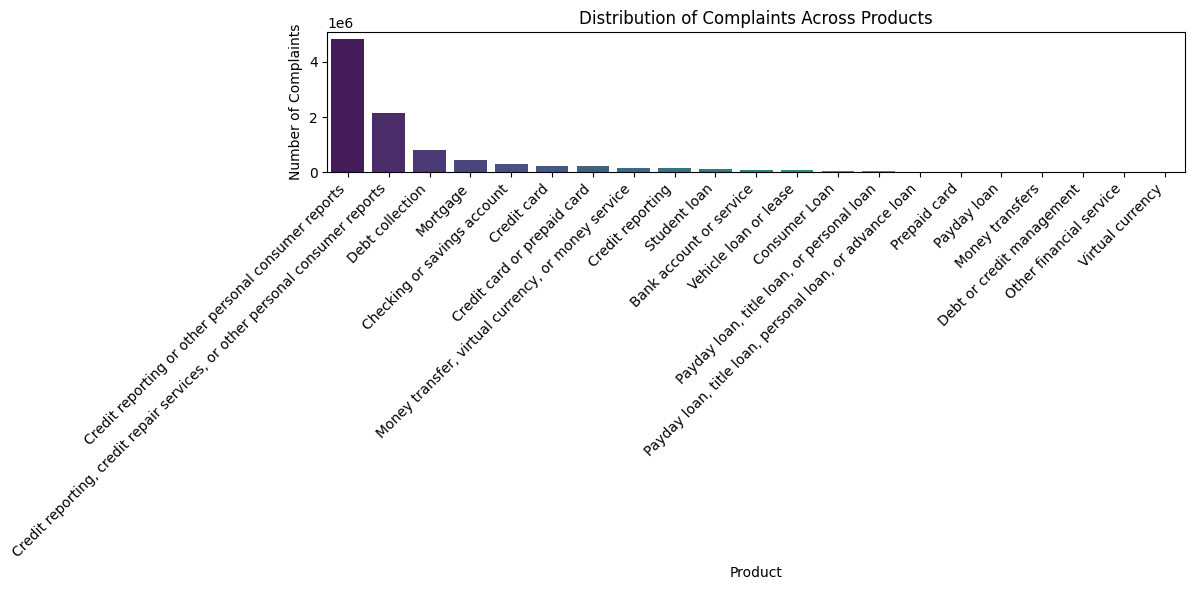

In [4]:
# Assuming product_distribution is already calculated
product_distribution = df['Product'].value_counts()

plt.figure(figsize=(12, 6))
# Updated seaborn barplot call to avoid the FutureWarning
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis', hue=product_distribution.index, legend=False)
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Narrative Analysis


--- Consumer Complaint Narrative Analysis ---
Number of complaints with missing narratives (NaN): 6629041
Number of complaints with narratives: 2980756
Percentage of missing narratives: 68.98%

Narrative length (word count) statistics:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64


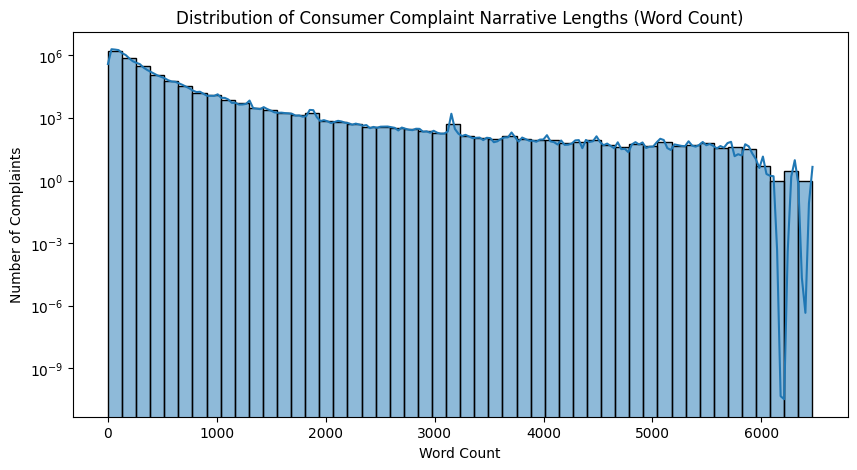


Number of very short narratives (< 5 words): 6632216
Number of very long narratives (top 1%): 95644


In [6]:
# --- Analyze Consumer Complaint Narrative ---
print("\n--- Consumer Complaint Narrative Analysis ---")

# Identify the number of complaints with and without narratives
narrative_missing_count = df['Consumer complaint narrative'].isnull().sum()
narrative_present_count = df['Consumer complaint narrative'].count() # .count() excludes NaN
print(f"Number of complaints with missing narratives (NaN): {narrative_missing_count}")
print(f"Number of complaints with narratives: {narrative_present_count}")
print(f"Percentage of missing narratives: {narrative_missing_count / len(df):.2%}")


# Calculate and visualize the length (word count) of the Consumer complaint narrative
# First, fill NaN temporarily for word count calculation to avoid errors, then convert to string
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').astype(str).apply(lambda x: len(x.split()))

print(f"\nNarrative length (word count) statistics:")
print(df['narrative_length'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_length'][df['narrative_length'] > 0], bins=50, kde=True) # Exclude 0-length for better visualization
plt.title('Distribution of Consumer Complaint Narrative Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.yscale('log') # Use log scale for y-axis if there's a very long tail
plt.show()

# Identify very short or very long narratives.
# You might want to inspect some of these manually to understand their nature
short_narratives = df[df['narrative_length'] < 5] # Example threshold for very short
long_narratives = df[df['narrative_length'] > df['narrative_length'].quantile(0.99)] # Top 1%
print(f"\nNumber of very short narratives (< 5 words): {len(short_narratives)}")
print(f"Number of very long narratives (top 1%): {len(long_narratives)}")

# Drop the temporary narrative_length column after analysis
df = df.drop(columns=['narrative_length'])

## Filtering Dataset


--- Filtering Dataset ---
Shape after initial product filtering: (958923, 5)

--- Filtering Dataset ---
Shape after initial product filtering: (958923, 5)
Removed 493244 rows with actual NaN narratives.
Shape after removing actual NaN narratives: (465679, 5)
Removed 0 rows with empty or whitespace-only narratives.
Shape after removing empty/whitespace-only narratives: (465679, 5)

--- Product Distribution After Filtering (and removing empty narratives) ---
Product
Checking or savings account                                140319
Credit card or prepaid card                                108667
Money transfer, virtual currency, or money service          97188
Credit card                                                 80667
Payday loan, title loan, or personal loan                   17238
Consumer Loan                                                9461
Payday loan, title loan, personal loan, or advance loan      8896
Payday loan                                                  1746
Mo

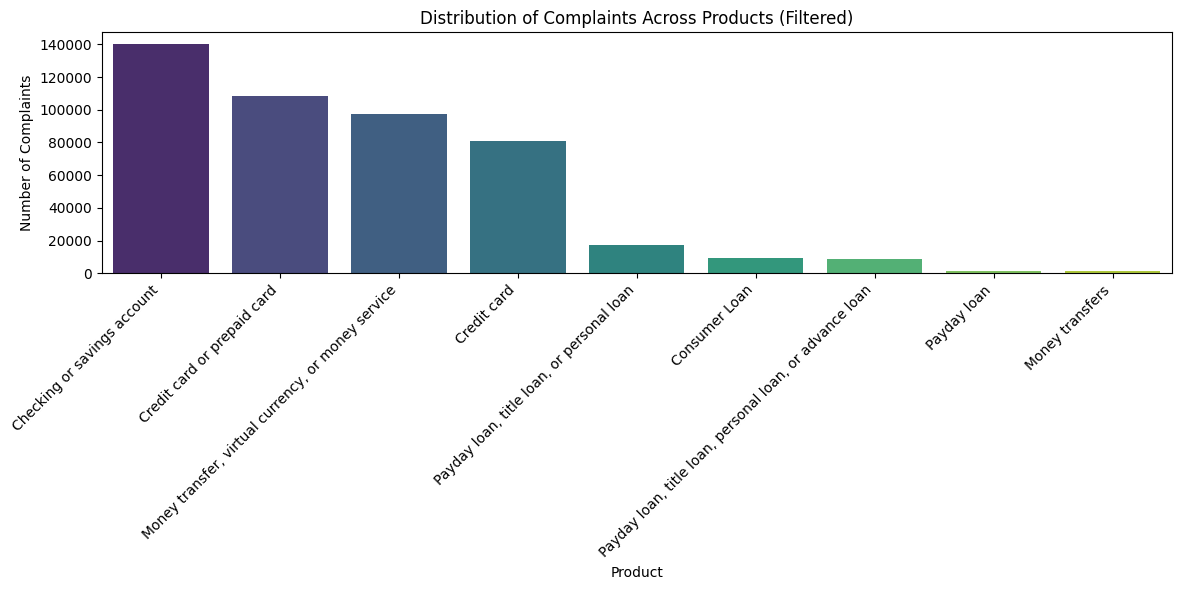

In [12]:
# --- Filter Dataset ---
print("\n--- Filtering Dataset ---")

# Define the target products based on the project requirements and available data.
# Note: 'Buy Now, Pay Later' is not explicitly listed as a distinct 'Product' in your data.
# This is an important observation for your report.
target_products = [
    'Credit card',
    'Credit card or prepaid card', # Broadly covers credit card related complaints
    'Payday loan, title loan, or personal loan',
    'Payday loan, title loan, personal loan, or advance loan',
    'Consumer Loan', # Captures other general consumer loans
    'Payday loan', # Specific type of personal loan
    'Checking or savings account', # Direct match for Savings Accounts
    'Money transfer, virtual currency, or money service', # Broader money transfer category
    'Money transfers' # Direct match for Money Transfers
]

# Filter by product categories

df_filtered = df[df['Product'].isin(target_products)].copy() # .copy() prevents SettingWithCopyWarning later

print(f"Shape after initial product filtering: {df_filtered.shape}")

# --- Filter Dataset ---
print("\n--- Filtering Dataset ---")

# ... (target_products and initial product filtering by df['Product'].isin(target_products) remains the same) ...
df_filtered = df[df['Product'].isin(target_products)].copy()
print(f"Shape after initial product filtering: {df_filtered.shape}")

initial_narrative_count = len(df_filtered)
df_filtered.dropna(subset=['Consumer complaint narrative'], inplace=True)
dropped_nans = initial_narrative_count - len(df_filtered)
print(f"Removed {dropped_nans} rows with actual NaN narratives.")
print(f"Shape after removing actual NaN narratives: {df_filtered.shape}")


# Now, convert to string and remove empty strings or whitespace-only strings
# This step is still important for any *truly empty* strings or those with only whitespace
df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].astype(str)
initial_str_count = len(df_filtered)
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].str.strip() != '']
dropped_empty_strings = initial_str_count - len(df_filtered)
print(f"Removed {dropped_empty_strings} rows with empty or whitespace-only narratives.")
print(f"Shape after removing empty/whitespace-only narratives: {df_filtered.shape}")

# Display the product distribution for the *filtered* dataset
print("\n--- Product Distribution After Filtering (and removing empty narratives) ---")
product_distribution_filtered = df_filtered['Product'].value_counts()
print(product_distribution_filtered)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_distribution_filtered.index, y=product_distribution_filtered.values, palette='viridis', hue=product_distribution_filtered.index, legend=False)
plt.title('Distribution of Complaints Across Products (Filtered)')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Clean Filtered Dataset

In [13]:

# --- Clean Text Narratives ---
print("\n--- Cleaning Text Narratives ---")

def clean_narrative(text):
    # Ensure text is string, though it should be after previous steps
    text = str(text)
    text = text.lower() # Lowercasing text

    boilerplate_phrases = [
        "i am writing to file a complaint",
        "to whom it may concern",
        "this is a formal complaint",
        "i am writing to express my dissatisfaction with",
        "regarding my account number", # Common placeholder to remove for PII
        "account number"
    ]
    for phrase in boilerplate_phrases:
        text = text.replace(phrase, "")

    # Replace sequences of 'x' (often used to redact PII) with a placeholder like 'XX'
    # This keeps a consistent token for redacted info
    text = re.sub(r'x{2,}', 'XX', text) # Matches two or more 'x's

    # Remove numbers (as they are typically account numbers, dates, etc., not relevant for semantic meaning)
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and special characters, keep only alphanumeric and spaces
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'Consumer complaint narrative' column
df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_narrative)

print("Narratives cleaned.")
print("\nFirst 5 cleaned narratives (showing first 200 characters):")
for i, narrative in enumerate(df_filtered['Consumer complaint narrative'].head().tolist()):
    print(f"  {i+1}: {narrative[:200]}...") # Print first 200 chars for brevity

# --- Save Cleaned and Filtered Dataset ---
print("\n--- Saving Cleaned and Filtered Dataset ---")

# Define the output path in  Google Drive
output_file_path = '/content/drive/My Drive/filtered_complaints.csv'

# Save the DataFrame to CSV
df_filtered.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"Cleaned and filtered dataset saved to: {output_file_path}")
print(f"Final dataset shape after all processing: {df_filtered.shape}")



--- Cleaning Text Narratives ---
Narratives cleaned.

First 5 cleaned narratives (showing first 200 characters):
  1: a XX XX card was opened under my name by a fraudster i received a notice from XX that an account was just opened under my name i reached out to XX XX to state that this activity was unauthorized and n...
  2: i made the mistake of using my wellsfargo debit card to depsit funds into XX atm machine outside their branch i went into the branch and was told they couldnt help and had to phone the customer servic...
  3: dear cfpb i have a secured credit card with citibank which is changed to unsecured card and i have been calling n waitting for the check release the secured amount for rhat credit card they told me to...
  4: i have a citi rewards cards the credit balance issued to me was i recently moved which meant my bills would be lowered which meant id have less use for my credit cards so in order to keep my usage in ...
  5: bi am writing to dispute the following charge